# import

In [1]:
import pandas as pd
import json
from glob import glob
import matplotlib.font_manager as fm
import matplotlib.pyplot as plt
plt.style.use('ggplot')
from tqdm import tqdm

In [35]:
jsons = glob('tweets/*.json')
for i, f in enumerate(jsons):
    print(i,f)

0 tweets/#กูสั่งให้มึงอยู่ใต้รัฐธรรมนูญ.json
1 tweets/#16ตุลาไปแยกปทุมวัน.json
2 tweets/#saveวันเฉลิม.json
3 tweets/#ธรรมศาสตร์และการชุมนุม.json
4 tweets/#เกียมอุดมไม่ก้มหัวให้เผด็จการ.json
5 tweets/#25พฤศจิกาไปSCB.json
6 tweets/#ม็อบ25พฤศจิกาทวงคืนสมบัติชาติ.json
7 tweets/#ม็อบ2ธันวา.json


# open file

In [102]:
i = 5

print(jsons[i])
df = pd.read_json(jsons[i], lines=True)
df

tweets/#25พฤศจิกาไปSCB.json


,id,conversation_id,created_at,date,time,timezone,user_id,username,name,place,...,geo,source,user_rt_id,user_rt,retweet_id,reply_to,retweet_date,translate,trans_src,trans_dest
0,1380541335246008320,1380541335246008320,2021-04-09 22:21:18+07:00,2021-04-09,22:21:18,700,79422312,jipatabook,new🌹🐈 #ขอคนละชื่อรื้อระบอบประยุทธ์,,...,,,,,,[],,,,
1,1369970898577412099,1369970898577412096,2021-03-11 18:18:09+07:00,2021-03-11,18:18:09,700,3241492268,tlhr2014,TLHR / ศูนย์ทนายความเพื่อสิทธิมนุษยชน,,...,,,,,,[],,,,
2,1366756337380564992,1366756337380564992,2021-03-02 21:24:38+07:00,2021-03-02,21:24:38,700,3241492268,tlhr2014,TLHR / ศูนย์ทนายความเพื่อสิทธิมนุษยชน,,...,,,,,,[],,,,
3,1347798486868221952,1347798486868221952,2021-01-09 13:52:54+07:00,2021-01-09,13:52:54,700,1129237103492120576,badwitchef,madu,,...,,,,,,[],,,,
4,1347797234809769985,1347797234809769984,2021-01-09 13:47:56+07:00,2021-01-09,13:47:56,700,1129237103492120576,badwitchef,madu,,...,,,,,,[],,,,
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
49045,1331257841672327170,1331257841672327168,2020-11-24 22:26:17+07:00,2020-11-24,22:26:17,700,1295445651472306176,commonpeoplex,CIIIP #ยกเลิก112,,...,,,,,,[],,,,
49046,1331257789386113025,1331257789386113024,2020-11-24 22:26:05+07:00,2020-11-24,22:26:05,700,948448013210431488,drgroupth,กลุ่มฟื้นฟูประชาธิปไตย | DRG,,...,,,,,,[],,,,
49047,1331257775968505856,1331257775968505856,2020-11-24 22:26:02+07:00,2020-11-24,22:26:02,700,1230027384482603008,pxcyg,your moon,,...,,,,,,[],,,,
49048,1331257700747862018,1331257700747862016,2020-11-24 22:25:44+07:00,2020-11-24,22:25:44,700,1296005753103212544,thammasatuftd,แนวร่วมธรรมศาสตร์และการชุมนุม,,...,,,,,,[],,,,


In [72]:
df.iloc[3]

id                                               1381195923112353800
conversation_id                                  1381195923112353792
created_at                                 2021-04-11 17:42:24+07:00
date                                             2021-04-11 00:00:00
time                                                        17:42:24
timezone                                                         700
user_id                                                    220213059
username                                                   lerdnarit
name                                                          x-face
place                                                               
tweet              รดด้วยเยี่ยวสิ #โควิด19 #โควิด19วันนี้ #Thaila...
language                                                          th
mentions                                                          []
urls                                                              []
photos                            

# EDA

#กูสั่งให้มึงอยู่ใต้รัฐธรรมนูญ


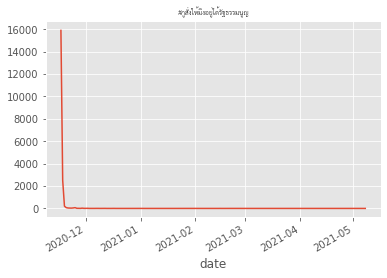

In [73]:
font_path = '/Users/Nozomi/Library/Fonts/THSarabunNew.ttf'
fp = fm.FontProperties(fname=font_path)

hashtag = jsons[i].split('/')[1].replace('.json','')

print(hashtag)

df.groupby(df["date"]).count()['id'].plot()
plt.title(hashtag, fontproperties=fp)
plt.show()

In [74]:
print(len(df.groupby('username').count()['id']), 'people')

for i, v in df.groupby('username').count()['id'].sort_values(ascending=False).value_counts().sort_index().iteritems():
    print(f"|{i}|{v}|")

8286 people
|1|5604|
|2|1202|
|3|493|
|4|269|
|5|157|
|6|92|
|7|90|
|8|53|
|9|49|
|10|41|
|11|32|
|12|24|
|13|17|
|14|16|
|15|13|
|16|18|
|17|17|
|18|10|
|19|11|
|20|8|
|21|9|
|22|3|
|23|8|
|24|1|
|25|3|
|26|4|
|27|2|
|29|1|
|30|2|
|31|1|
|32|1|
|33|2|
|34|1|
|35|3|
|36|3|
|37|1|
|38|1|
|39|2|
|40|3|
|41|2|
|42|1|
|44|1|
|45|2|
|47|2|
|48|1|
|49|2|
|56|1|
|59|1|
|62|1|
|68|2|
|118|1|
|136|1|
|355|1|


# oldest tweets

In [69]:
df.tail(10)[['created_at','username','tweet','retweets_count']].sort_values(['created_at'])

,created_at,username,tweet,retweets_count
278311,2020-10-16 16:10:02+07:00,uauajutatip,ย้ายมาแยกปทุมวัน เวลาเดิม ลงถนน! #16ตุลาไปราชป...,37582
278310,2020-10-16 16:11:37+07:00,humancanspeak,ไปปทุมวันกันหรอ #15ตุลาไปราชประสงค์ #16ตุลาไปร...,31
278309,2020-10-16 16:11:46+07:00,mybabytenten,ย้ายที่ค่ะ #16ตุลาไปแยกปทุมวัน,569
278308,2020-10-16 16:12:02+07:00,yg24894395,#16ตุลาไปราชประสงค์ #16ตุลาไปแยกปทุมวัน,13
278307,2020-10-16 16:12:08+07:00,originality_man,#16ตุลาไปแยกปทุมวัน,8
278306,2020-10-16 16:12:37+07:00,lycanz14,#16ตุลาไปแยกปทุมวัน,0
278305,2020-10-16 16:12:38+07:00,onedaywellc,#16ตุลาไปราชประสงค์ #16ตุลาไปแยกปทุมวัน,1
278304,2020-10-16 16:12:58+07:00,iam_jiw,แยกปทุมวันครับทุกคน!! #16ตุลาไปแยกปทุมวัน,165
278303,2020-10-16 16:13:00+07:00,warncc,แยกปทุมวัน ไปๆๆๆๆ #16ตุลาไปแยกปทุมวัน,2
278302,2020-10-16 16:13:03+07:00,originality_man,#16ตุลาไปแยกปทุมวัน,9


In [70]:
for i, row in df.tail(10)[['created_at','username','tweet','retweets_count','link']].sort_values(['created_at']).iterrows():
    row['created_at'] = str(row['created_at']).split('+')[0]
    row['retweets_count'] = str(row['retweets_count'])
    row['link'] = f"[link]({row['link']})"
    print('|'+"|".join(row)+"|")

|2020-10-16 16:10:02|uauajutatip|ย้ายมาแยกปทุมวัน เวลาเดิม ลงถนน! #16ตุลาไปราชประสงค์ #16ตุลาไปแยกปทุมวัน|37582|[link](https://twitter.com/uauajutatip/status/1317030029579087872)|
|2020-10-16 16:11:37|humancanspeak|ไปปทุมวันกันหรอ #15ตุลาไปราชประสงค์ #16ตุลาไปราชประสงค์ #16ตุลาไปแยกปทุมวัน|31|[link](https://twitter.com/humancanspeak/status/1317030425886294018)|
|2020-10-16 16:11:46|mybabytenten|ย้ายที่ค่ะ #16ตุลาไปแยกปทุมวัน|569|[link](https://twitter.com/mybabytenten/status/1317030464104800257)|
|2020-10-16 16:12:02|yg24894395|#16ตุลาไปราชประสงค์ #16ตุลาไปแยกปทุมวัน|13|[link](https://twitter.com/YG24894395/status/1317030529137455105)|
|2020-10-16 16:12:08|originality_man|#16ตุลาไปแยกปทุมวัน|8|[link](https://twitter.com/originality_man/status/1317030554500362240)|
|2020-10-16 16:12:37|lycanz14|#16ตุลาไปแยกปทุมวัน|0|[link](https://twitter.com/Lycanz14/status/1317030679033491456)|
|2020-10-16 16:12:38|onedaywellc|#16ตุลาไปราชประสงค์ #16ตุลาไปแยกปทุมวัน|1|[link](https://twitter.com/oneday

# most frequently retweeted 

In [46]:
df.sort_values(["retweets_count"], ascending=False)[['created_at','username','tweet','retweets_count']].head(10)

,created_at,username,tweet,retweets_count
195409,2020-10-16 19:24:30+07:00,violettewautier,การชุมนุมต่อสู้เพื่อความยุติธรรม เพื่อประชาธิป...,151500
238826,2020-10-16 18:59:31+07:00,tptourpab,คุณเห็นความแตกต่างของ 2 กลุ่มนี้ไหม คุณเอะใจ ม...,107177
131489,2020-10-16 20:15:42+07:00,thebattz,อห โคตรสุดเลยภาพนี้ มือเปล่าๆประจันหน้ากับรถฉี...,94728
205938,2020-10-16 19:18:22+07:00,ud_awat,พวกคุณใช้ความรุนแรงแบบนี้กับประชาชนมือเปล่า รั...,91899
241401,2020-10-16 18:58:02+07:00,25novemm,เหี้ยมาก น้ำสีฟ้าที่มันฉีดใส่ เป็นเคมีฟิสิกส์ ...,87483
32665,2020-10-16 23:25:11+07:00,angangopilan,ล่าสุดหนูพึ่งได้ให้สัมภาษณ์กับสื่อแคนาดา (CBC ...,86561
219509,2020-10-16 19:10:18+07:00,jankzinn,มึงอันนี้เหี้ยมากอะ หลวงพี่เข้าไปไหว้คนขับรถฉี...,85091
199810,2020-10-16 19:21:50+07:00,8laryn,เซพพี่คนนี้เค้สด้วยนะคะ เห็นเค้ายืนขวางรถให้มา...,84489
194318,2020-10-16 19:25:12+07:00,vousjay2,ทุกคนอย่าให้คลิปนี้หายไป ขอร้อง ช่วยรีกันไปเยอ...,83345
173004,2020-10-16 19:42:08+07:00,liszukung,เชี่ยเอ๊ย คุณฐาปนีย์แม่งแนวหน้ามาก มีเสียงแว่ว...,83260


In [55]:
for i, row in df.sort_values(["retweets_count"], ascending=False)[['created_at','username','tweet','retweets_count','link']].head(10).iterrows():
    row['created_at'] = str(row['created_at']).split('+')[0]
    row['retweets_count'] = str(row['retweets_count'])
    row['link'] = f"[link]({row['link']})"
    print('|'+"|".join(row)+"|")

|2020-09-11 16:42:07|malykh_jj|หลายคนก่อนเข้ามาประกวดบอกอยากเป็นกระบอกเสียง อยากใช้ Platformเวทีนางงามในการแก้ปัญหา แต่พอถึงเวลามีปัญหาจริงละเงียบกริบ คือไรคุณพี่ สงสารมารีญามากที่แบกวงการนางงามอยู่ขอบคุณมารีญามากเป็นกระบอกเสียงที่ดีและมีจุดยืน #มารีญา #คัดค้านนําเข้าเศษพลาสติก #ธรรมศาสตร์และการชุมนุม  https://t.co/Eb3FV8TWjT|81673|[link](https://twitter.com/malykh_jj/status/1304354526401495040)|
|2020-02-26 18:12:52|beenobeeta|เมิงงง มธ ประกาศ จะนำ นศ ไปราชดำเนิน  ยังไงดี น้องเค้าเปิดแล้วนะ #ธรรมศาสตร์และการชุมนุม|63250|[link](https://twitter.com/beenobeeta/status/1232624568348495872)|
|2020-02-26 19:03:58|xiaozaoput|"หนังสือก็ต้องอ่าน รัฐบาลก็ต้องด่า" มันส์สุดทีน55555   #ธรรมศาสตร์และการชุมนุม  https://t.co/eZwgrW1Hty|62298|[link](https://twitter.com/Xiaozaoput/status/1232637427203706880)|
|2020-09-19 19:09:30|nnoophilaa|แม่เจ้า หนึ่งทุ่ม คนเต็มท้องสนามหลวงเลย มันแบบ... กุว่ามันจะจบที่รุ่นเราจริงๆแหละทุกคน ความหวังมันมากขึ้นไปเรื่อยๆ 😭🙏🏻 #19กันยาทวงอํานาจคืนราษฏร #ธรรมศาสตร์และการชุม